In [6]:
import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/voice_overall.csv') 
print(data.columns)

Index(['mdn', 'idnt_client_crm', 'idnt_compte_facturation', 'desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_octets', 'princp_data_vol_total_secteur',
       'princp_data_vol_total_ville', 'princp_voix_dur_jour_secteur',
       'princp_voix_dur_jour_ville', 'princp_voix_dur_soir_secteur',
       'princp_voix_dur_soir_ville', 'princp_voix_dur_nuit_secteur',
       'princp_voix_dur_nuit_ville', 'princp_voix_dur_total_minutes',
       'princp_voix_dur_total_secteur', 'princp_voix_dur_total_ville',
       'princp_actv_total_secteur', 'princp_actv_ville', 'princp_vol_actv'],
      dtype='object')


In [7]:


# Compter le nombre d'occurrences des valeurs distinctes dans chaque colonne
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Colonne '{column}':")
    print(value_counts)
    print()


Colonne 'mdn':
0adf7cb1e06a2572a658ef4b5d9b0861    1
7734ad9bd0d2dde8ff78c0c85196ff78    1
2f1629c85648d49aac9c17574150c784    1
f64a8417d454e901ce8d7aab6ead8307    1
12157e6debcb436fa081dc81b0691e4f    1
                                   ..
c29953aba8f30f17cafe2073cf5a98e1    1
06cd59a2d5ccf6d9e89e1a265b1cc519    1
67b3470020771de98b0f36d659fd7b11    1
9aadb07352e1b5a3ab5d56b8c0712742    1
ec3f8165a9cd6b6e1dba6735ed41bec0    1
Name: mdn, Length: 34120, dtype: int64

Colonne 'idnt_client_crm':
6a822e6ee506eb1fcc4e0d2bebbb74fc18d90927ec285943b133a634ecf02b63    5
c71383d8310e2108e9594ac6c66b9f8a                                    3
37dfbcfaad8bf833d38422630d828fe7                                    2
98918201920329e92d2dcaacde17e8ba                                    2
7f0fe0ad702bb6f26ae8d235247d659a                                    2
                                                                   ..
b4809d483887bafaa7b8273e86814a38                                    1
c8e366e9e8

Colonne 'princp_vol_actv':
0.693147    399
0.209721    281
0.490623    218
0.416515    217
0.394292    214
           ... 
3.752636      1
3.703768      1
3.739256      1
4.920711      1
4.602834      1
Name: princp_vol_actv, Length: 3187, dtype: int64



In [8]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])

# Afficher les colonnes catégorielles
print(colonnes_categorielles.columns)

Index(['mdn', 'idnt_client_crm', 'idnt_compte_facturation', 'desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_secteur', 'princp_data_vol_total_ville',
       'princp_voix_dur_jour_secteur', 'princp_voix_dur_jour_ville',
       'princp_voix_dur_soir_secteur', 'princp_voix_dur_soir_ville',
       'princp_voix_dur_nuit_secteur', 'princp_voix_dur_nuit_ville',
       'princp_voix_dur_total_secteur', 'princp_voix_dur_total_ville',
       'princp_actv_total_secteur', 'princp_actv_ville'],
      dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable
    

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

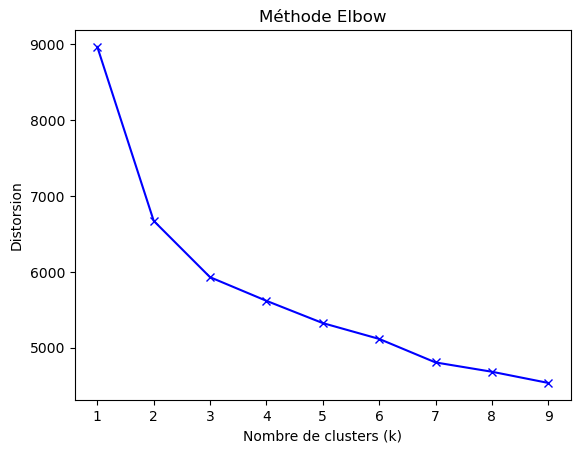

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from scipy.spatial.distance import cdist

# Sélectionner les colonnes pertinentes pour la méthode Elbow
# Ajoutez les noms des colonnes supplémentaires à la liste features
features = data[['desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_octets', 'princp_data_vol_total_secteur',
       'princp_data_vol_total_ville', 'princp_voix_dur_jour_secteur',
       'princp_voix_dur_jour_ville', 'princp_voix_dur_soir_secteur',
       'princp_voix_dur_soir_ville', 'princp_voix_dur_nuit_secteur',
       'princp_voix_dur_nuit_ville', 'princp_voix_dur_total_secteur',
       'princp_voix_dur_total_ville', 'princp_actv_total_secteur',
       'princp_actv_ville', 'princp_vol_actv']]

# Normaliser les données si nécessaire (utilisez StandardScaler ou MinMaxScaler)

# Appliquer la méthode Elbow pour déterminer le nombre optimal de clusters
distortions = []
K = range(1, 10)  # Essayer différents nombres de clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features)
    kmeanModel.fit(features)
    distortions.append(sum(np.min(cdist(features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])

# Tracer la courbe de la variance expliquée en fonction du nombre de clusters
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distorsion')
plt.title('Méthode Elbow')
plt.show()


In [14]:


# Compter le nombre d'occurrences des valeurs distinctes dans chaque colonne
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Colonne '{column}':")
    print(value_counts)
    print()


Colonne 'mdn':
1396     1
15968    1
6293     1
32854    1
2401     1
        ..
25990    1
872      1
13859    1
20630    1
31562    1
Name: mdn, Length: 34120, dtype: int64

Colonne 'idnt_client_crm':
14136    5
26471    3
7476     2
20332    2
16917    2
        ..
24028    1
26712    1
19961    1
9861     1
20387    1
Name: idnt_client_crm, Length: 34048, dtype: int64

Colonne 'idnt_compte_facturation':
26921    3
11626    2
33044    2
3908     2
13205    2
        ..
10954    1
25149    1
30699    1
21991    1
514      1
Name: idnt_compte_facturation, Length: 34104, dtype: int64

Colonne 'desc_profil':
62    13295
61     5219
30     2487
32     1843
3      1185
      ...  
7         2
8         2
21        2
37        1
51        1
Name: desc_profil, Length: 64, dtype: int64

Colonne 'princp_data_vol_jour_secteur':
0        8230
10535      92
584        31
6309       27
64         26
         ... 
4717        1
1875        1
11575       1
5367        1
11106       1
Name: princp_d

In [15]:
print(data.columns)

Index(['mdn', 'idnt_client_crm', 'idnt_compte_facturation', 'desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_octets', 'princp_data_vol_total_secteur',
       'princp_data_vol_total_ville', 'princp_voix_dur_jour_secteur',
       'princp_voix_dur_jour_ville', 'princp_voix_dur_soir_secteur',
       'princp_voix_dur_soir_ville', 'princp_voix_dur_nuit_secteur',
       'princp_voix_dur_nuit_ville', 'princp_voix_dur_total_minutes',
       'princp_voix_dur_total_secteur', 'princp_voix_dur_total_ville',
       'princp_actv_total_secteur', 'princp_actv_ville', 'princp_vol_actv'],
      dtype='object')


In [28]:
from sklearn.cluster import KMeans
import pandas as pd

# Sélection des colonnes pertinentes
selected_columns =['desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_octets', 'princp_data_vol_total_secteur',
       'princp_data_vol_total_ville', 'princp_voix_dur_jour_secteur',
       'princp_voix_dur_jour_ville', 'princp_voix_dur_soir_secteur',
       'princp_voix_dur_soir_ville', 'princp_voix_dur_nuit_secteur',
       'princp_voix_dur_nuit_ville', 'princp_voix_dur_total_minutes',
       'princp_voix_dur_total_secteur', 'princp_voix_dur_total_ville',
       'princp_actv_total_secteur', 'princp_actv_ville', 'princp_vol_actv']

# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]

# Instanciation et ajustement du modèle K-means
k = 4 # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Récupération des coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

# Affichage des étiquettes de cluster pour chaque point de données
print(labels)

# Affichage des coordonnées des centres de cluster
print(cluster_centers)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 3 2 ... 0 0 2]
[[4.46361755e+01 6.43343967e+03 4.06610099e+01 4.95011817e+03
  2.65879553e+01 4.29973955e+03 3.28824503e+01 1.83900040e+01
  7.23480795e+03 3.79957575e+01 3.02717757e+03 1.90696399e+01
  2.20861341e+03 1.92509313e+01 6.88873137e+01 1.51096854e+00
  1.58702286e+00 3.89330546e+03 1.50887831e+01 3.89330546e+03
  1.50887831e+01 1.58702286e+00]
 [4.81641039e+01 1.05143466e+04 6.41492577e+01 9.92677983e+03
  4.97591463e+01 8.06450371e+03 5.81378579e+01 1.87575638e+01
  1.19566498e+04 6.25743637e+01 5.32508470e+03 3.11310976e+01
  4.23679494e+03 3.16281813e+01 1.23352466e+02 2.55381760e+00
  1.50993568e+00 7.05758046e+03 2.39620891e+01 7.05758046e+03
  2.39620891e+01 1.50993568e+00]
 [4.58333852e+01 1.43753572e+03 2.80750973e+01 1.81989946e+03
  2.56692607e+01 1.99069471e+03 3.54079377e+01 1.72221354e+01
  2.79463440e+03 3.91417121e+01 1.62002623e+03 1.89432685e+01
  1.30871183e+03 2.03283268e+01 3.53788327e+01 1.46700389e+00
  1.52859616e+00 2.11649377e+03 1.51859922e+01 2

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(X, labels)
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.2905936607373366


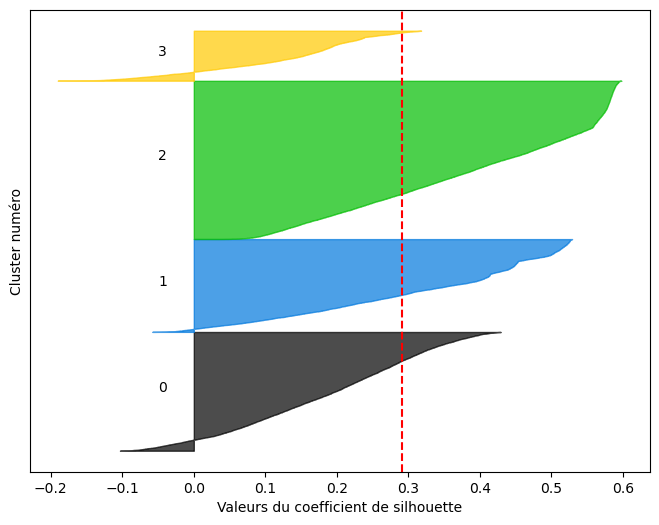

In [30]:
# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(X, labels)

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(k):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / k)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


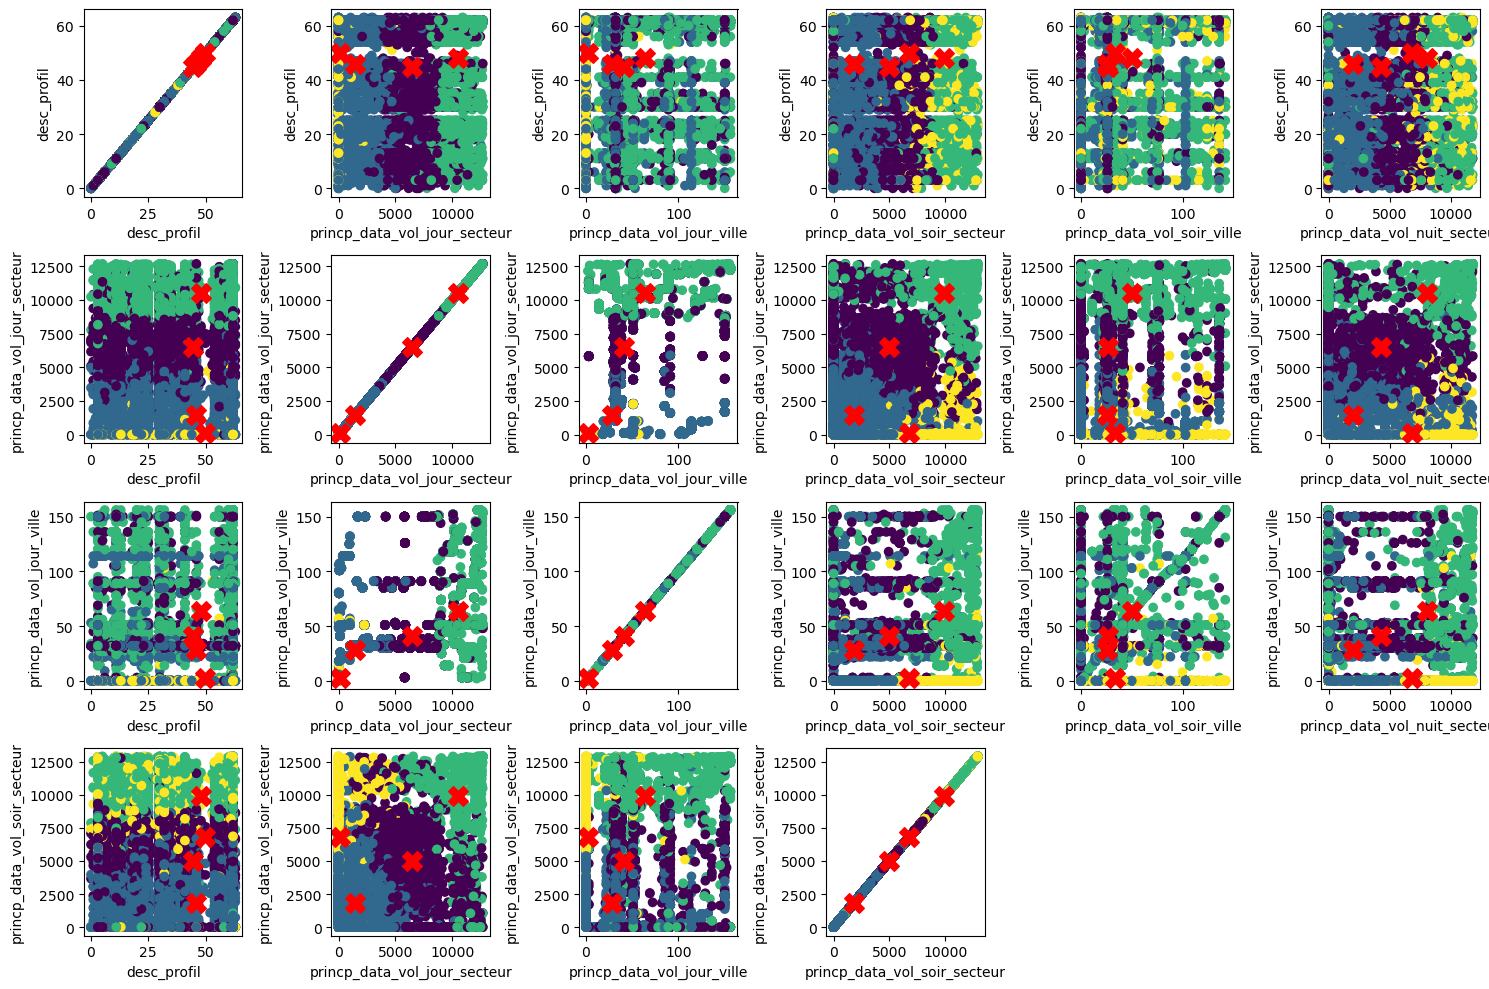

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

# Création d'un dataframe avec les colonnes spécifiées
df = pd.DataFrame(data, columns= ['desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_octets', 'princp_data_vol_total_secteur',
       'princp_data_vol_total_ville', 'princp_voix_dur_jour_secteur',
       'princp_voix_dur_jour_ville', 'princp_voix_dur_soir_secteur',
       'princp_voix_dur_soir_ville', 'princp_voix_dur_nuit_secteur',
       'princp_voix_dur_nuit_ville', 'princp_voix_dur_total_minutes',
       'princp_voix_dur_total_secteur', 'princp_voix_dur_total_ville',
       'princp_actv_total_secteur', 'princp_actv_ville', 'princp_vol_actv'
])

# Liste des colonnes à utiliser pour le clustering et les scatter plots
columns =  ['desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_octets', 'princp_data_vol_total_secteur',
       'princp_data_vol_total_ville', 'princp_voix_dur_jour_secteur',
       'princp_voix_dur_jour_ville', 'princp_voix_dur_soir_secteur',
       'princp_voix_dur_soir_ville', 'princp_voix_dur_nuit_secteur',
       'princp_voix_dur_nuit_ville', 'princp_voix_dur_total_minutes',
       'princp_voix_dur_total_secteur', 'princp_voix_dur_total_ville',
       'princp_actv_total_secteur', 'princp_actv_ville', 'princp_vol_actv']


# Création d'un objet KMeans avec le nombre de clusters désiré
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)

# Ajustement du modèle sur les données
kmeans.fit(df[columns])

# Prédiction des clusters pour chaque ligne du dataframe
labels = kmeans.predict(df[columns])

# Obtention des coordonnées des centres de clusters
cluster_centers = kmeans.cluster_centers_

# Calcul du nombre de plots par ligne
plots_per_line = 6

# Calcul du nombre de lignes nécessaires
num_lines = len(columns) // plots_per_line + 1

# Affichage de la matrice de scatter plots avec les clusters, les groupes et les centres de clusters
fig, axes = plt.subplots(num_lines, plots_per_line, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    row = i // plots_per_line
    col = i % plots_per_line

    if i < len(columns):
        ax.scatter(df[columns[col]], df[columns[row]], c=labels)  # Modification ici
        ax.scatter(cluster_centers[:, col], cluster_centers[:, row], marker='X', color='red', s=200)  # Modification ici
        ax.set_xlabel(columns[col])  # Modification ici
        ax.set_ylabel(columns[row])  # Modification ici
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [32]:
from sklearn.cluster import KMeans
import pandas as pd

# Votre code pour l'instanciation et l'ajustement du modèle K-means

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Création d'une nouvelle colonne dans le DataFrame pour les étiquettes de cluster
data['cluster_label'] = labels


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 3 ... 0 0 3]
[[19.04970579  0.8382295   0.8382295 ]
 [ 1.07464115  1.50127718  1.50127718]
 [10.11143256  1.40833051  1.40833051]
 [19.33410504  2.71175417  2.71175417]]
Caractéristiques du cluster 0:
princp_data_vol_total_octets     19.051619
princp_voix_dur_total_minutes     0.843286
princp_vol_actv                   0.843286
dtype: float64


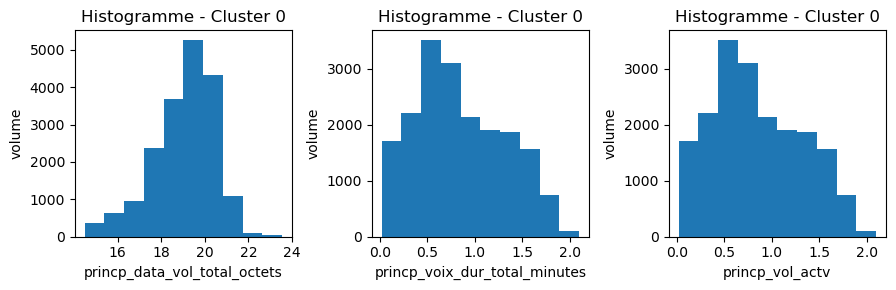

Caractéristiques du cluster 1:
princp_data_vol_total_octets     1.074641
princp_voix_dur_total_minutes    1.501277
princp_vol_actv                  1.501277
dtype: float64


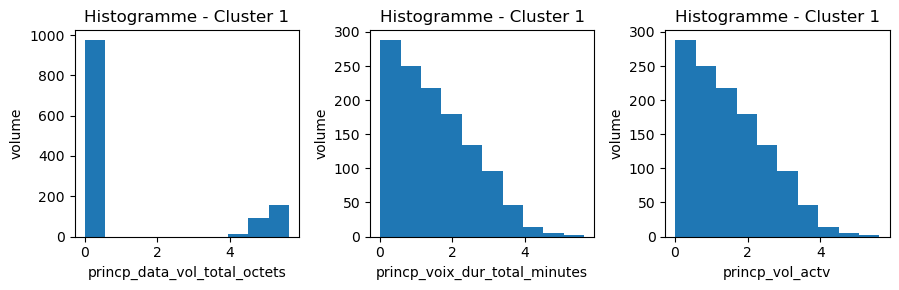

Caractéristiques du cluster 2:
princp_data_vol_total_octets     10.111433
princp_voix_dur_total_minutes     1.408331
princp_vol_actv                   1.408331
dtype: float64


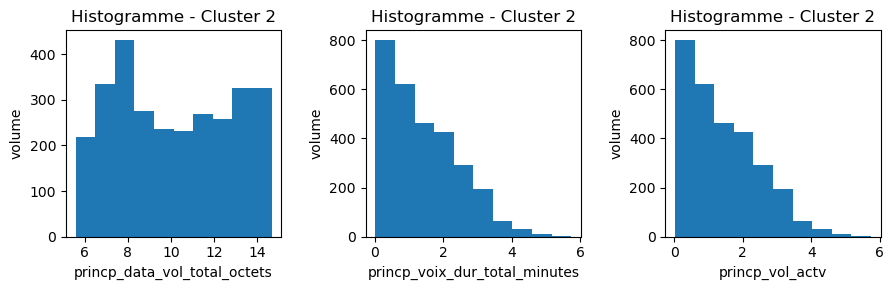

Caractéristiques du cluster 3:
princp_data_vol_total_octets     19.333529
princp_voix_dur_total_minutes     2.720686
princp_vol_actv                   2.720686
dtype: float64


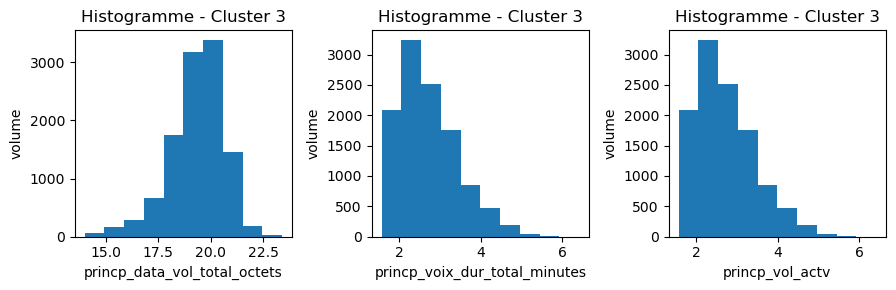

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

columns = ['princp_data_vol_total_octets',
           'princp_voix_dur_total_minutes',
           'princp_vol_actv']

# Extraction des données à partir des colonnes sélectionnées
X = data[columns]

# Instanciation et ajustement du modèle K-means
k = 4  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Récupération des coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

# Affichage des étiquettes de cluster pour chaque point de données
print(labels)

# Affichage des coordonnées des centres de cluster
print(cluster_centers)

# Extraction des caractéristiques pour chaque classe
data['cluster_labels'] = labels
for cluster_label in range(k):
    cluster_data = data[data['cluster_labels'] == cluster_label]
    cluster_features = cluster_data[columns].mean()
    print(f"Caractéristiques du cluster {cluster_label}:")
    print(cluster_features)
    
    plt.figure(figsize=(15, 3))  # Définit la taille de la figure globale

    plt.subplot(151)  # Crée le premier sous-graphique
    plt.hist(cluster_data['princp_data_vol_total_octets'], bins=10)
    plt.xlabel('princp_data_vol_total_octets')
    plt.ylabel('volume')
    plt.title(f'Histogramme - Cluster {cluster_label}')

    plt.subplot(152)  # Crée le deuxième sous-graphique
    plt.hist(cluster_data['princp_voix_dur_total_minutes'], bins=10)
    plt.xlabel('princp_voix_dur_total_minutes')
    plt.ylabel("volume")
    plt.title(f'Histogramme - Cluster {cluster_label}')

    plt.subplot(153)  # Crée le troisième sous-graphique
    plt.hist(cluster_data['princp_vol_actv'], bins=10)
    plt.xlabel('princp_vol_actv')
    plt.ylabel("volume")
    plt.title(f'Histogramme - Cluster {cluster_label}')

    plt.tight_layout()  # Ajuste l'espacement entre les sous-graphiques
    plt.show()
